In [50]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report


In [36]:
file_path = "C:/Users/Farrukh Naveed/Downloads/archive (2)/Ice Cream Sales - temperatures.csv"

In [37]:
df = pd.read_csv(file_path)

In [39]:
df.head()


,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [40]:
# rename the ice cream sales column to Revenue
df.rename(columns={'Ice Cream Profits': 'Revenue'}, inplace=True)



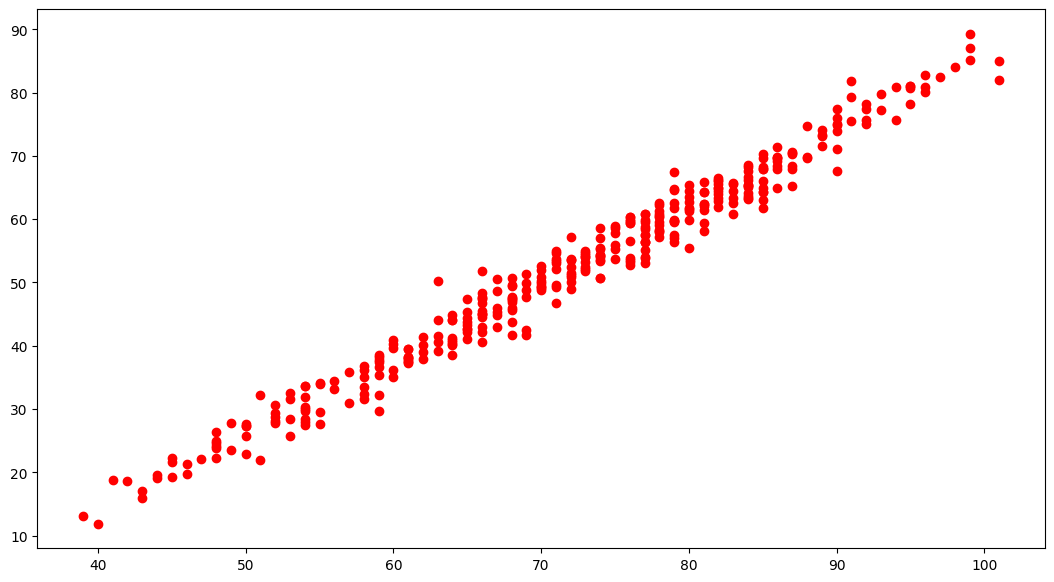

In [41]:
plt.figure(figsize=(13, 7))
plt.scatter(x='Temperature', y='Revenue', data=df, color='red')

In [42]:
X = df[['Temperature']]
y = df['Revenue']


Can we take y as independent variable? What do you think?

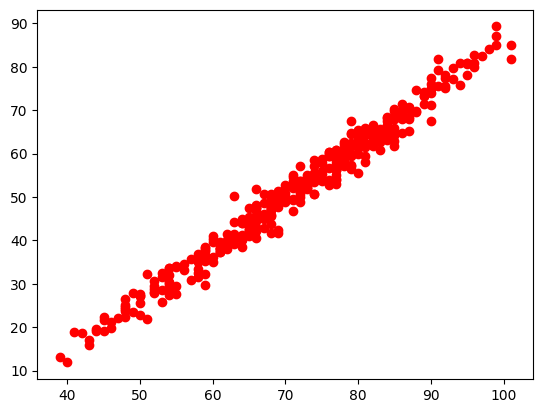

In [43]:
plt.scatter(X, y, color='red')

In [45]:
r = df.corr()
r


,Temperature,Revenue
Temperature,1.000000,0.988446
Revenue,0.988446,1.000000


In [46]:
r_square = r['Revenue']['Temperature'] ** 2
r_square

0.9770249461722693

In [47]:
.988446**2

0.9770254949160001

Interpretation of r and r-square

Lets Start Regression Analysis

First you need to think that is it necessary to split the data into training and testing sets? 
If yes, then why?
when it is necessary to split the data into train and test sets?

In [57]:
pop_model = LinearRegression()
pop_model.fit(X, y)

LinearRegression()

In [58]:
pop_model.coef_

array([1.19200893])

In [59]:
pop_model.intercept_

-33.698166002474984

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [61]:
model.coef_

array([1.19015046])

In [62]:
model.intercept_

-33.6606595289816

In [63]:
model.predict([[40]])

c:\Users\Farrukh Naveed\miniconda3\envs\python_eda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.94535884])

In [64]:
model.predict([[45]])

c:\Users\Farrukh Naveed\miniconda3\envs\python_eda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.89611113])

In [65]:
X_train.head()

,Temperature
211,76
340,91
202,75
75,61
84,62


In [71]:
-33.6606595289816+(76*1.19015046)

56.7907754310184

In [74]:
y_pred = model.predict(X_test)
y_pred

array([54.41047445, 28.22716435, 23.46656251, 67.5021295 , 35.3680671 ,
       53.22032399, 38.93851848, 44.88927078, 49.64987261, 46.07942124,
       73.4528818 , 30.60746527, 67.5021295 , 35.3680671 , 47.2695717 ,
       66.31197904, 12.75520838, 63.93167812, 72.26273134, 43.69912032,
       19.89611113, 50.84002307, 37.74836802, 61.55137721, 60.36122675,
       54.41047445, 57.98092583, 66.31197904, 78.21348363, 84.16423593,
       25.84686343, 43.69912032, 30.60746527, 79.40363409, 54.41047445,
       44.88927078, 36.55821756, 25.84686343, 74.64303226, 72.26273134,
       60.36122675, 75.83318272, 28.22716435, 66.31197904, 43.69912032,
       59.17107629, 41.3188194 , 35.3680671 , 17.51581022, 30.60746527,
       59.17107629, 75.83318272, 65.12182858, 62.74152767, 53.22032399,
       73.4528818 , 42.50896986, 16.32565976, 82.97408547, 38.93851848,
       59.17107629, 77.02333318, 38.93851848, 30.60746527, 62.74152767,
       37.74836802, 57.98092583, 46.07942124, 56.79077537, 38.93

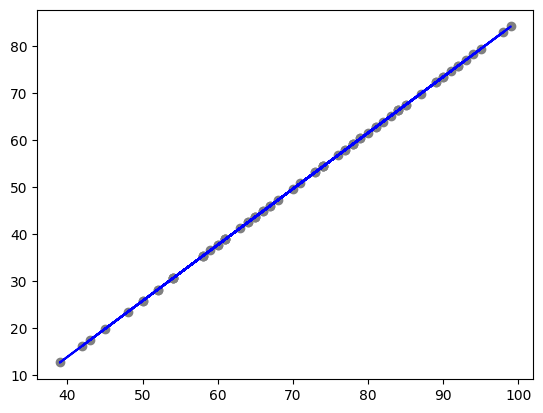

In [75]:
plt.scatter(X_test, y_pred, color='grey')
plt.plot(X_test, y_pred, color='blue')

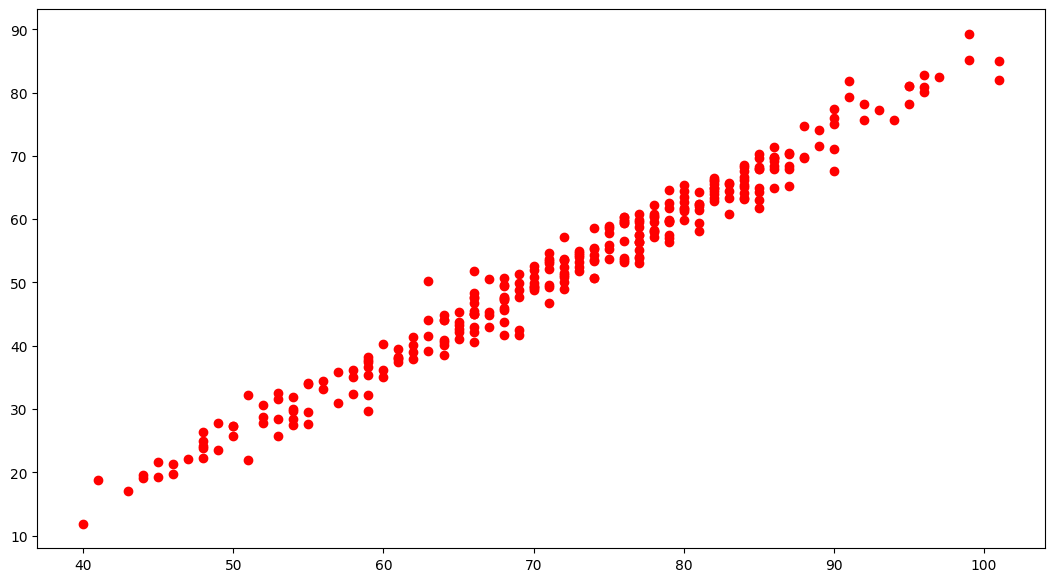

In [76]:
plt.figure(figsize=(13, 7))
plt.scatter(X_train, y_train, color='red')


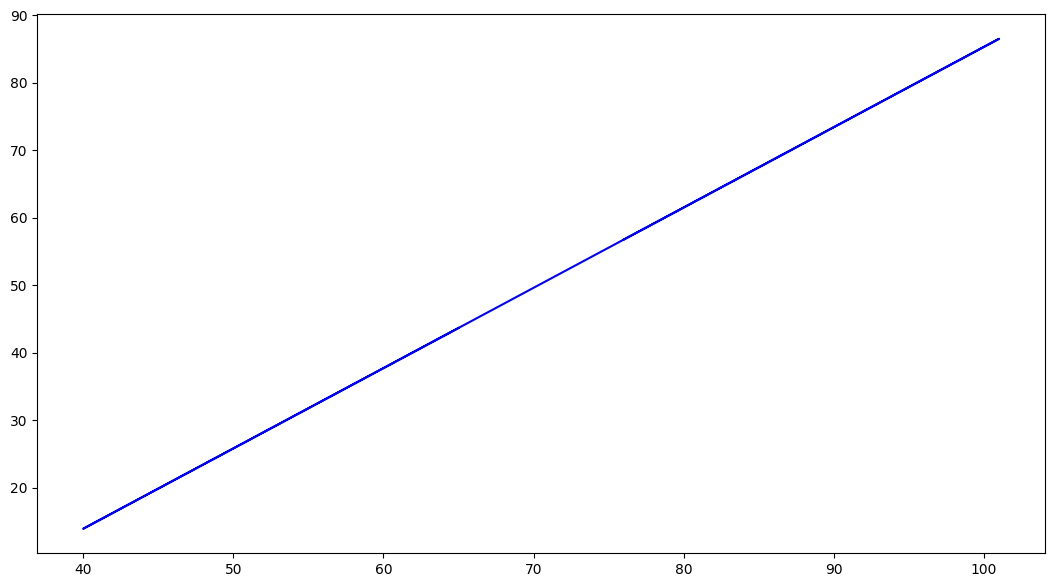

In [77]:
plt.figure(figsize=(13, 7))
plt.plot(X_train, model.predict(X_train), color='blue')

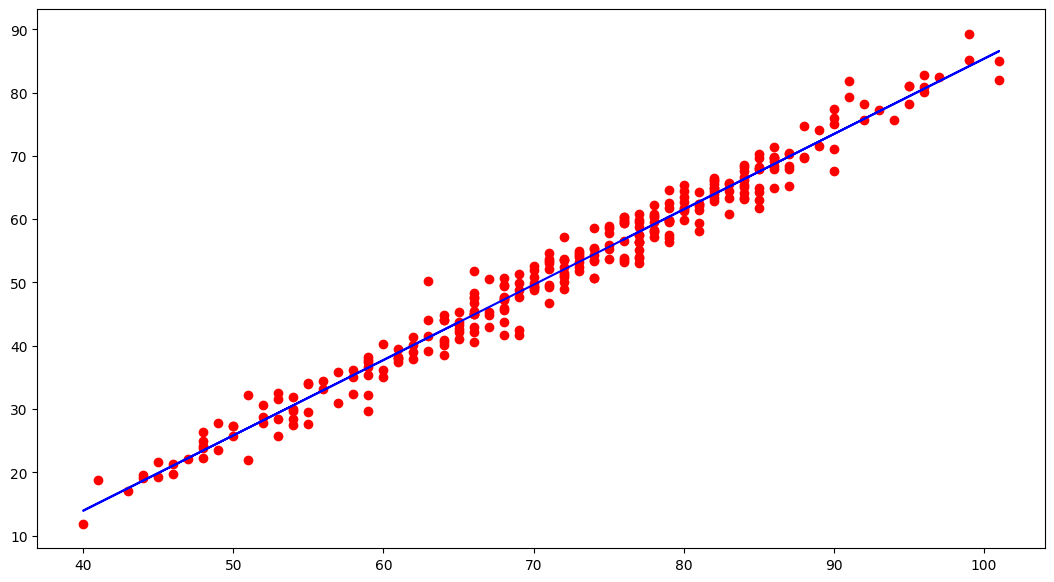

In [78]:
plt.figure(figsize=(13, 7))
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train), color='blue')

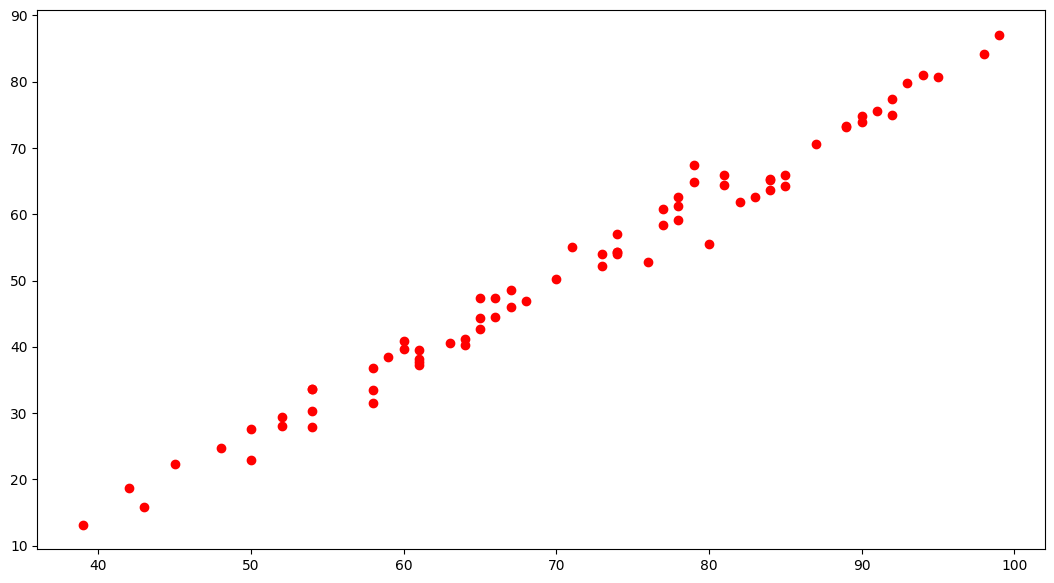

In [79]:
plt.figure(figsize=(13, 7))
plt.scatter(X_test, y_test, color='red')

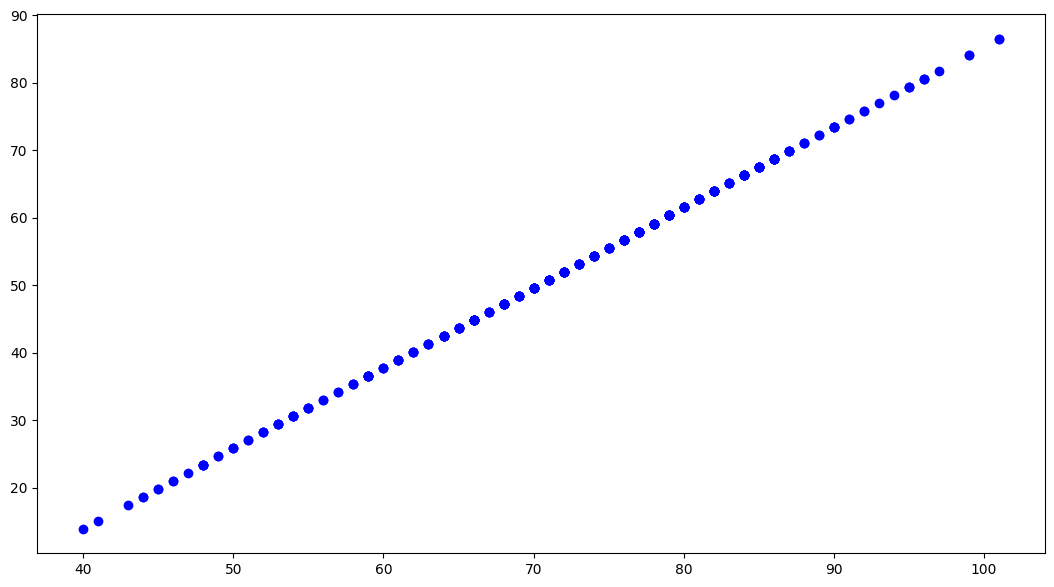

In [80]:
plt.figure(figsize=(13, 7))
plt.scatter(X_train, model.predict(X_train), color='blue')

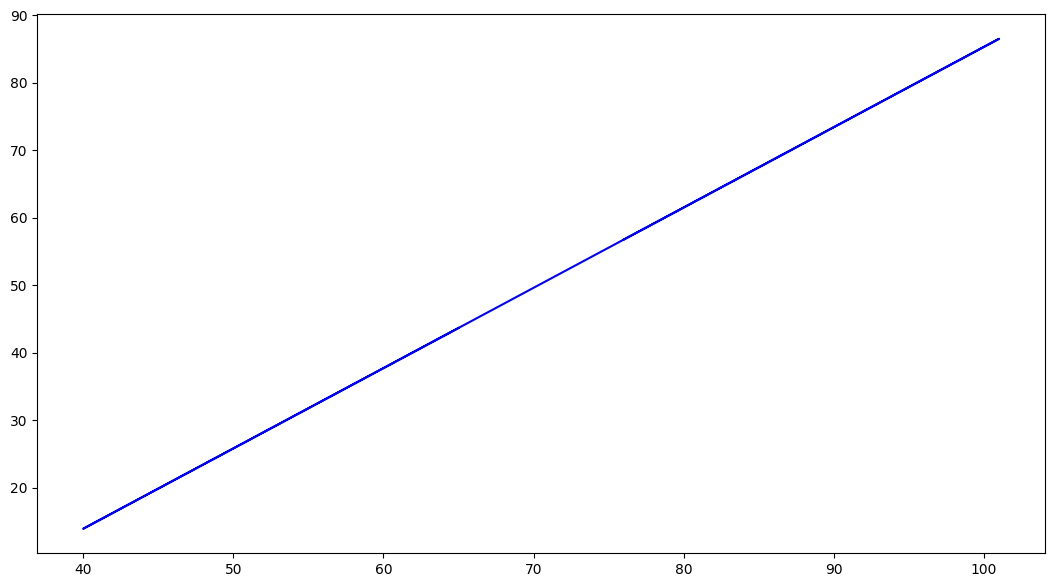

In [81]:
plt.figure(figsize=(13, 7))
plt.plot(X_train, model.predict(X_train), color='blue')

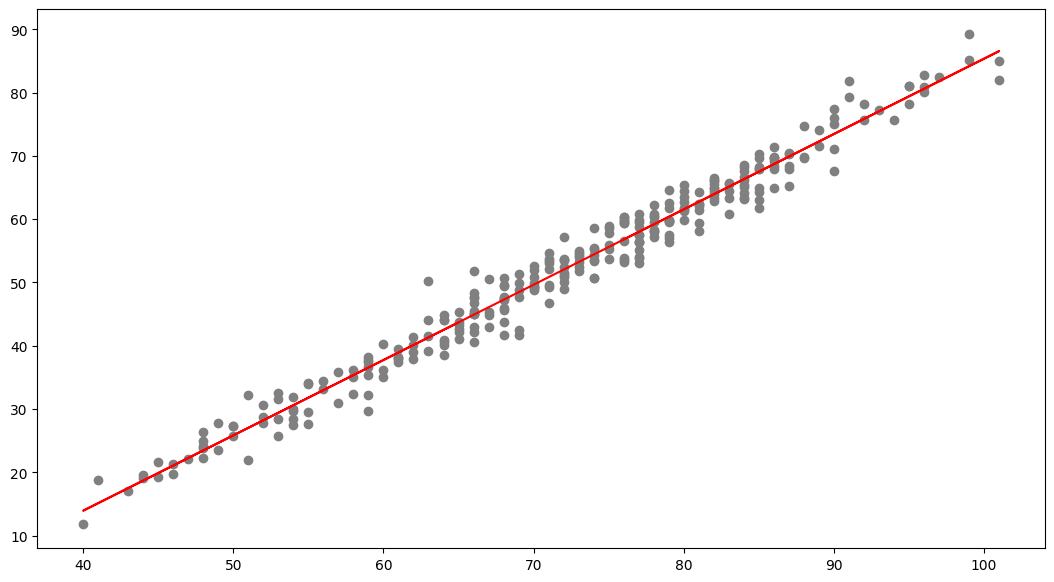

In [82]:
plt.figure(figsize=(13, 7))
plt.scatter(X_train, y_train, color='grey')
plt.plot(X_train, model.predict(X_train), color='red')

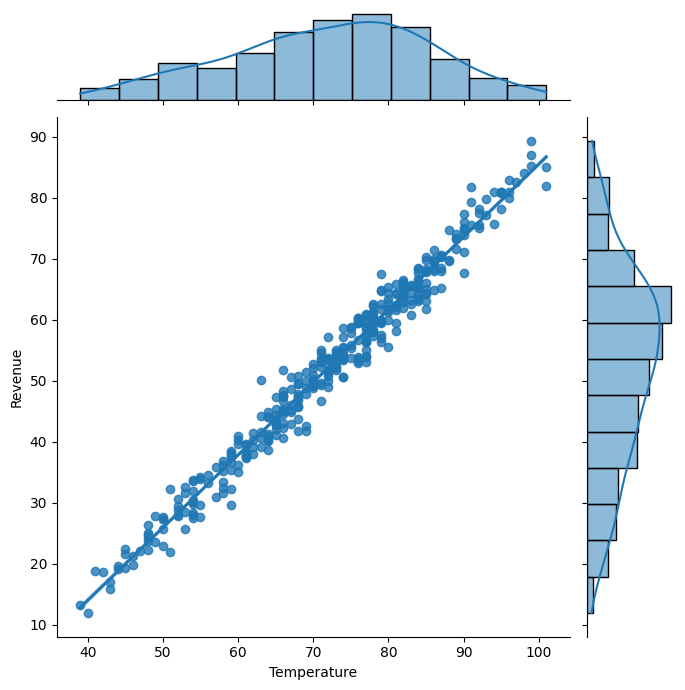

In [83]:
sns.jointplot(x='Temperature', y='Revenue', data=df, kind= 'reg', height=7)

In [85]:
print("the slope coefficient is equal to: ", model.coef_)
print("the y-intercept is equal to: ",model.intercept_)

the slope coefficient is equal to:  [1.19015046]
the y-intercept is equal to:  -33.6606595289816


Confirming that manual prediction and prediction using trained model provide the same results

In [86]:
1.19*40 -33.66

13.939999999999998

In [87]:
temp = 40
model.predict([[temp]])

c:\Users\Farrukh Naveed\miniconda3\envs\python_eda\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.94535884])

In [90]:
# Assessing the accuracy of the model using Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, and R2 Score
y_pred = model.predict(X_test)
print("Mean Absolute Error = ", mean_absolute_error(y_test, y_pred))


Mean Absolute Error =  1.8485293149506414


In [92]:

print("Mean Squared Error = ", mean_squared_error(y_test, y_pred))


Mean Squared Error =  5.294200791081213


In [93]:
print("Root Mean Squared Error = ", math.sqrt(mean_squared_error(y_test, y_pred)))


Root Mean Squared Error =  2.300913034228198


In [94]:
print("R-square = ",r2_score(y_test, y_pred))


R-square =  0.9836178994668145


comparing the sample mean and population using t-test

In [97]:
# Population Mean
df['Revenue'].mean()

52.10361643835618

In [ ]:
# taking sample from the population of Revenue comprised of 50 observations
sample = df.sample(n=50, random_state=42)
sample['Revenue'].mean()

49.955

In [ ]:
stats.ttest_1samp(sample['Revenue'], df['Revenue'].mean())

TtestResult(statistic=-0.8184754027097427, pvalue=0.41704852470877407, df=49)